# TGDS Model using Intermediate Variables

In [1]:
import context
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os
from numba import cuda


import src.data.data_preprocessing as util
import src.models.intermediate_lstm_model as lstm

os.environ["CUDA_VISIBLE_DEVICES"]="0"
tf.compat.v1.set_random_seed(1)

2022-09-21 10:51:05.550781: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-21 10:51:05.667607: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-21 10:51:06.053000: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:$LD_LIBRARY_PATH:/home/i40/bielskip/miniconda3/envs/battery-system/lib/:/home/i40/bielskip/miniconda3/envs/battery-system/lib/:/home/i40/bielskip/miniconda3/envs/battery-system/lib/:/home/i4

### Set Hyperparameters

In [2]:
# load general hyperparameters
HYPER_PARAMS =  np.load('../../../models/training_setup/hyperparameters.npy', allow_pickle=True)
HYPER_PARAMS = HYPER_PARAMS.item()

# add aditional model-spefic hyperparameters
model_hyperparameters = {
    'n_features': 2,               # number of input features
    'd_t': 0.25,                   # current integration factor
    'loss_funcs': ['mse', 'soc'],  # loss functions
    'lambda_mse': 1,               # mse weighting factor
    'lambda_soc': 2,               # approximation loss weighting factor
}

# update hyperparameters
HYPER_PARAMS.update(model_hyperparameters)

### Prepare Training/Validation/Test Data

In [3]:
# load training sets dictionary
TRAINING_SETS =  np.load('../../../models/training_setup/training_sets.npy', allow_pickle=True)
TRAINING_SETS = TRAINING_SETS.item()

# select correct training set
training_sets = TRAINING_SETS['10A_all']

# create training data
train_data = []
for set in training_sets:
    set_repeat = [set] * HYPER_PARAMS['num_repeat']
    train_data += set_repeat
    
train_data = np.array(train_data)

# select first profile for validation
validation_profile = [train_data[0]]

# select arbitrary profile for testing
test_profile = np.random.choice(train_data, 1) 

# prepare input data
X_train, y_train, scalers_train = util.prepare_intermediate_input(HYPER_PARAMS, train_data, HYPER_PARAMS['stack'], HYPER_PARAMS['cell'])
X_validation, y_validation, _ = util.prepare_intermediate_input(HYPER_PARAMS, validation_profile, HYPER_PARAMS['stack'], HYPER_PARAMS['cell'])
X_test, y_test, _ = util.prepare_intermediate_input(HYPER_PARAMS, test_profile, HYPER_PARAMS['stack'], HYPER_PARAMS['cell'])

Input: (46750, 100, 2)  Output/Label: (46750, 2)
Input: (1500, 100, 2)  Output/Label: (1500, 2)
Input: (1450, 100, 2)  Output/Label: (1450, 2)


### Initialize and Train Model

In [4]:
lstm = lstm.Model()
lstm.initialize(HYPER_PARAMS, scalers_train)

2022-09-21 10:51:08.376453: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 10:51:08.396953: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 10:51:08.397131: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 10:51:08.397626: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/5


2022-09-21 10:51:09.597660: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


 - const: 0.0253
   1/1461 [..............................] - ETA: 1:03:32 - loss: 0.0861 - mse: 0.1934 - mae: 0.2758

2022-09-21 10:51:11.749990: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


 - const: 0.0223
  72/1461 [>.............................] - ETA: 8:10 - loss: 0.0137 - mse: 0.2619 - mae: 0.2983 - const: 0.001


 144/1461 [=>............................] - ETA: 7:44 - loss: 0.0089 - mse: 0.2626 - mae: 0.2983 - const: 0.0012


 216/1461 [===>..........................] - ETA: 7:18 - loss: 0.0071 - mse: 0.2653 - mae: 0.3001 - const: 0.0012


 288/1461 [====>.........................] - ETA: 6:53 - loss: 0.0061 - mse: 0.2644 - mae: 0.2992 - const: 0.0011


 360/1461 [======>.......................] - ETA: 6:27 - loss: 0.0055 - mse: 0.2620 - mae: 0.2973 - const: 0.0012


 432/1461 [=======>......................] - ETA: 6:02 - loss: 0.0051 - mse: 0.2608 - mae: 0.2962 - const: 0.0007


 504/1461 [=========>....................] - ETA: 5:37 - loss: 0.0048 - mse: 0.2595 - mae: 0.2951 - const: 0.0013


 576/1461 [==========>...................] - ETA: 5:12 - loss: 0.0046 - mse: 0.2599 - mae: 0.2953 - const: 0.0007


 648/1461 [============>.................] - ETA: 4:47 - loss: 0.0044 - mse: 0.2611 - mae: 0.2961 - const: 0.0009


 720/1461 [=============>................] - ETA: 4:21 - loss: 0.0042 - mse: 0.2607 - mae: 0.2958 - const: 0.0012


 792/1461 [===============>..............] - ETA: 3:56 - loss: 0.0041 - mse: 0.2601 - mae: 0.2953 - const: 0.0008


 864/1461 [================>.............] - ETA: 3:31 - loss: 0.0040 - mse: 0.2608 - mae: 0.2958 - const: 0.0009


 936/1461 [==================>...........] - ETA: 3:05 - loss: 0.0040 - mse: 0.2611 - mae: 0.2960 - const: 0.0011


1008/1461 [===================>..........] - ETA: 2:40 - loss: 0.0039 - mse: 0.2613 - mae: 0.2961 - const: 0.0006


1080/1461 [=====================>........] - ETA: 2:15 - loss: 0.0038 - mse: 0.2616 - mae: 0.2963 - const: 0.0011


1152/1461 [======================>.......] - ETA: 1:49 - loss: 0.0038 - mse: 0.2616 - mae: 0.2963 - const: 0.001


1224/1461 [========================>.....] - ETA: 1:24 - loss: 0.0037 - mse: 0.2615 - mae: 0.2962 - const: 0.0009


1296/1461 [=========================>....] - ETA: 58s - loss: 0.0037 - mse: 0.2615 - mae: 0.2962 - const: 0.0009


1368/1461 [===========================>..] - ETA: 33s - loss: 0.0036 - mse: 0.2616 - mae: 0.2962 - const: 0.0006


1440/1461 [============================>.] - ETA: 7s - loss: 0.0036 - mse: 0.2610 - mae: 0.2957 - const: 0.0009


1461/1461 [==============================] - 522s 356ms/step - loss: 0.0036 - mse: 0.2609 - mae: 0.2957
Epoch 2/5
 - const: 0.0009
  51/1461 [>.............................] - ETA: 8:26 - loss: 0.0028 - mse: 0.2657 - mae: 0.2991 - const: 0.0011


 123/1461 [=>............................] - ETA: 8:01 - loss: 0.0028 - mse: 0.2651 - mae: 0.2986 - const: 0.0009


 195/1461 [===>..........................] - ETA: 7:35 - loss: 0.0028 - mse: 0.2596 - mae: 0.2944 - const: 0.0005


 267/1461 [====>.........................] - ETA: 7:10 - loss: 0.0028 - mse: 0.2596 - mae: 0.2944 - const: 0.0012


 339/1461 [=====>........................] - ETA: 6:44 - loss: 0.0029 - mse: 0.2611 - mae: 0.2955 - const: 0.0009


 411/1461 [=======>......................] - ETA: 6:19 - loss: 0.0029 - mse: 0.2597 - mae: 0.2944 - const: 0.0007


 483/1461 [========>.....................] - ETA: 5:53 - loss: 0.0029 - mse: 0.2601 - mae: 0.2947 - const: 0.0006


 555/1461 [==========>...................] - ETA: 5:27 - loss: 0.0029 - mse: 0.2602 - mae: 0.2948 - const: 0.0011


 627/1461 [===========>..................] - ETA: 5:01 - loss: 0.0029 - mse: 0.2601 - mae: 0.2948 - const: 0.0009


 699/1461 [=============>................] - ETA: 4:35 - loss: 0.0029 - mse: 0.2606 - mae: 0.2951 - const: 0.0011


 771/1461 [==============>...............] - ETA: 4:09 - loss: 0.0029 - mse: 0.2610 - mae: 0.2954 - const: 0.0008


 843/1461 [================>.............] - ETA: 3:43 - loss: 0.0029 - mse: 0.2601 - mae: 0.2947 - const: 0.001


 915/1461 [=================>............] - ETA: 3:17 - loss: 0.0029 - mse: 0.2592 - mae: 0.2941 - const: 0.0013


 987/1461 [===================>..........] - ETA: 2:51 - loss: 0.0029 - mse: 0.2593 - mae: 0.2942 - const: 0.0012


1059/1461 [====================>.........] - ETA: 2:25 - loss: 0.0029 - mse: 0.2599 - mae: 0.2946 - const: 0.0008


1131/1461 [======================>.......] - ETA: 1:59 - loss: 0.0029 - mse: 0.2596 - mae: 0.2944 - const: 0.0009


1203/1461 [=======================>......] - ETA: 1:33 - loss: 0.0029 - mse: 0.2599 - mae: 0.2946 - const: 0.001


1275/1461 [=========================>....] - ETA: 1:07 - loss: 0.0029 - mse: 0.2599 - mae: 0.2946 - const: 0.0009


1347/1461 [==========================>...] - ETA: 41s - loss: 0.0029 - mse: 0.2605 - mae: 0.2951 - const: 0.001


1419/1461 [============================>.] - ETA: 15s - loss: 0.0029 - mse: 0.2607 - mae: 0.2953 - const: 0.0006


1461/1461 [==============================] - 531s 363ms/step - loss: 0.0029 - mse: 0.2610 - mae: 0.2955
Epoch 3/5
 - const: 0.0008
  30/1461 [..............................] - ETA: 8:41 - loss: 0.0028 - mse: 0.2484 - mae: 0.2862 - const: 0.0008


 102/1461 [=>............................] - ETA: 8:15 - loss: 0.0028 - mse: 0.2621 - mae: 0.2966 - const: 0.0009


 174/1461 [==>...........................] - ETA: 7:49 - loss: 0.0028 - mse: 0.2634 - mae: 0.2974 - const: 0.001


 246/1461 [====>.........................] - ETA: 7:23 - loss: 0.0028 - mse: 0.2614 - mae: 0.2959 - const: 0.0009


 318/1461 [=====>........................] - ETA: 6:57 - loss: 0.0028 - mse: 0.2620 - mae: 0.2964 - const: 0.0008


 390/1461 [=======>......................] - ETA: 6:31 - loss: 0.0028 - mse: 0.2614 - mae: 0.2958 - const: 0.0008


 462/1461 [========>.....................] - ETA: 6:05 - loss: 0.0028 - mse: 0.2616 - mae: 0.2960 - const: 0.0008


 534/1461 [=========>....................] - ETA: 5:39 - loss: 0.0028 - mse: 0.2623 - mae: 0.2966 - const: 0.0014


 606/1461 [===========>..................] - ETA: 5:12 - loss: 0.0028 - mse: 0.2613 - mae: 0.2957 - const: 0.0006


 678/1461 [============>.................] - ETA: 4:46 - loss: 0.0028 - mse: 0.2618 - mae: 0.2960 - const: 0.0009


 750/1461 [==============>...............] - ETA: 4:20 - loss: 0.0028 - mse: 0.2620 - mae: 0.2962 - const: 0.001


 822/1461 [===============>..............] - ETA: 3:53 - loss: 0.0028 - mse: 0.2608 - mae: 0.2953 - const: 0.001


 894/1461 [=================>............] - ETA: 3:27 - loss: 0.0028 - mse: 0.2608 - mae: 0.2953 - const: 0.001


 966/1461 [==================>...........] - ETA: 3:01 - loss: 0.0028 - mse: 0.2606 - mae: 0.2952 - const: 0.0011


1038/1461 [====================>.........] - ETA: 2:34 - loss: 0.0028 - mse: 0.2604 - mae: 0.2950 - const: 0.0008


1110/1461 [=====================>........] - ETA: 2:08 - loss: 0.0028 - mse: 0.2604 - mae: 0.2950 - const: 0.0007


1182/1461 [=======================>......] - ETA: 1:42 - loss: 0.0028 - mse: 0.2604 - mae: 0.2950 - const: 0.0011


1254/1461 [========================>.....] - ETA: 1:15 - loss: 0.0028 - mse: 0.2608 - mae: 0.2953 - const: 0.0008


1326/1461 [==========================>...] - ETA: 49s - loss: 0.0028 - mse: 0.2606 - mae: 0.2952 - const: 0.0007


1398/1461 [===========================>..] - ETA: 23s - loss: 0.0028 - mse: 0.2608 - mae: 0.2953 - const: 0.0008


1461/1461 [==============================] - 535s 366ms/step - loss: 0.0028 - mse: 0.2610 - mae: 0.2955
Epoch 4/5
 - const: 0.0009
   9/1461 [..............................] - ETA: 8:51 - loss: 0.0028 - mse: 0.2794 - mae: 0.3103 - const: 0.0008


  81/1461 [>.............................] - ETA: 8:25 - loss: 0.0029 - mse: 0.2513 - mae: 0.2883 - const: 0.001


 153/1461 [==>...........................] - ETA: 8:00 - loss: 0.0029 - mse: 0.2572 - mae: 0.2926 - const: 0.001


 225/1461 [===>..........................] - ETA: 7:34 - loss: 0.0029 - mse: 0.2572 - mae: 0.2924 - const: 0.0008


 297/1461 [=====>........................] - ETA: 7:07 - loss: 0.0029 - mse: 0.2570 - mae: 0.2923 - const: 0.0009


 369/1461 [======>.......................] - ETA: 6:40 - loss: 0.0028 - mse: 0.2569 - mae: 0.2922 - const: 0.0007


 441/1461 [========>.....................] - ETA: 6:14 - loss: 0.0028 - mse: 0.2585 - mae: 0.2935 - const: 0.0008


 513/1461 [=========>....................] - ETA: 5:47 - loss: 0.0028 - mse: 0.2595 - mae: 0.2942 - const: 0.001


 585/1461 [===========>..................] - ETA: 5:21 - loss: 0.0028 - mse: 0.2608 - mae: 0.2952 - const: 0.001


 657/1461 [============>.................] - ETA: 4:54 - loss: 0.0028 - mse: 0.2615 - mae: 0.2957 - const: 0.0008


 729/1461 [=============>................] - ETA: 4:28 - loss: 0.0028 - mse: 0.2610 - mae: 0.2953 - const: 0.0007


 801/1461 [===============>..............] - ETA: 4:02 - loss: 0.0028 - mse: 0.2620 - mae: 0.2960 - const: 0.0008


 873/1461 [================>.............] - ETA: 3:35 - loss: 0.0028 - mse: 0.2620 - mae: 0.2960 - const: 0.0008


 945/1461 [==================>...........] - ETA: 3:09 - loss: 0.0028 - mse: 0.2621 - mae: 0.2961 - const: 0.0007


1017/1461 [===================>..........] - ETA: 2:42 - loss: 0.0028 - mse: 0.2625 - mae: 0.2965 - const: 0.0007


1089/1461 [=====================>........] - ETA: 2:16 - loss: 0.0028 - mse: 0.2621 - mae: 0.2962 - const: 0.0008


1161/1461 [======================>.......] - ETA: 1:50 - loss: 0.0028 - mse: 0.2620 - mae: 0.2961 - const: 0.0011


1233/1461 [========================>.....] - ETA: 1:23 - loss: 0.0028 - mse: 0.2617 - mae: 0.2959 - const: 0.0007


1305/1461 [=========================>....] - ETA: 57s - loss: 0.0028 - mse: 0.2608 - mae: 0.2952 - const: 0.0008


1377/1461 [===========================>..] - ETA: 30s - loss: 0.0028 - mse: 0.2612 - mae: 0.2955 - const: 0.0015


1449/1461 [============================>.] - ETA: 4s - loss: 0.0028 - mse: 0.2609 - mae: 0.2954 - const: 0.0007


1461/1461 [==============================] - 536s 367ms/step - loss: 0.0028 - mse: 0.2610 - mae: 0.2955
Epoch 5/5
 - const: 0.0008
  60/1461 [>.............................] - ETA: 8:34 - loss: 0.0028 - mse: 0.2533 - mae: 0.2898 - const: 0.0012


 132/1461 [=>............................] - ETA: 8:08 - loss: 0.0028 - mse: 0.2600 - mae: 0.2946 - const: 0.001


 204/1461 [===>..........................] - ETA: 7:41 - loss: 0.0028 - mse: 0.2632 - mae: 0.2970 - const: 0.0009


 276/1461 [====>.........................] - ETA: 7:14 - loss: 0.0028 - mse: 0.2617 - mae: 0.2959 - const: 0.0008


 348/1461 [======>.......................] - ETA: 6:48 - loss: 0.0028 - mse: 0.2613 - mae: 0.2954 - const: 0.001


 420/1461 [=======>......................] - ETA: 6:21 - loss: 0.0028 - mse: 0.2611 - mae: 0.2953 - const: 0.0009


 492/1461 [=========>....................] - ETA: 5:55 - loss: 0.0028 - mse: 0.2614 - mae: 0.2957 - const: 0.0007


 564/1461 [==========>...................] - ETA: 5:28 - loss: 0.0028 - mse: 0.2615 - mae: 0.2957 - const: 0.001


 636/1461 [============>.................] - ETA: 5:02 - loss: 0.0028 - mse: 0.2611 - mae: 0.2955 - const: 0.0008


 708/1461 [=============>................] - ETA: 4:36 - loss: 0.0028 - mse: 0.2604 - mae: 0.2950 - const: 0.0009


 780/1461 [===============>..............] - ETA: 4:09 - loss: 0.0028 - mse: 0.2606 - mae: 0.2951 - const: 0.0007


 852/1461 [================>.............] - ETA: 3:43 - loss: 0.0028 - mse: 0.2604 - mae: 0.2950 - const: 0.0009


 924/1461 [=================>............] - ETA: 3:17 - loss: 0.0028 - mse: 0.2599 - mae: 0.2946 - const: 0.0008


 996/1461 [===================>..........] - ETA: 2:50 - loss: 0.0028 - mse: 0.2599 - mae: 0.2947 - const: 0.0009


1068/1461 [====================>.........] - ETA: 2:24 - loss: 0.0028 - mse: 0.2596 - mae: 0.2944 - const: 0.0011


1140/1461 [======================>.......] - ETA: 1:57 - loss: 0.0028 - mse: 0.2591 - mae: 0.2941 - const: 0.0007


1212/1461 [=======================>......] - ETA: 1:31 - loss: 0.0028 - mse: 0.2597 - mae: 0.2945 - const: 0.0009


1284/1461 [=========================>....] - ETA: 1:04 - loss: 0.0028 - mse: 0.2601 - mae: 0.2948 - const: 0.001


1356/1461 [==========================>...] - ETA: 38s - loss: 0.0028 - mse: 0.2607 - mae: 0.2952 - const: 0.0008


1428/1461 [============================>.] - ETA: 12s - loss: 0.0028 - mse: 0.2608 - mae: 0.2953 - const: 0.0007


1461/1461 [==============================] - 536s 367ms/step - loss: 0.0028 - mse: 0.2610 - mae: 0.2955
Training time: 2660.608s


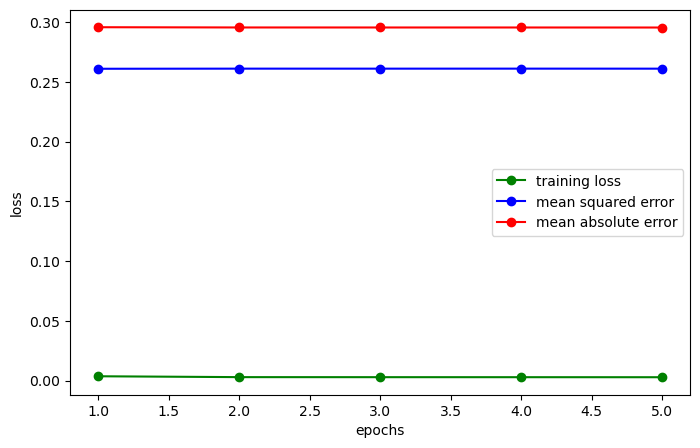

INFO:tensorflow:Assets written to: ../../../models/TGDS/2846/assets


INFO:tensorflow:Assets written to: ../../../models/TGDS/2846/assets


In [5]:
_, fig = lstm.train(X_train, y_train, scalers_train)

# save model and hyperparameters
MODEL_ID = str(np.random.randint(10000))

lstm.model.save('../../../models/TGDS/' + str(MODEL_ID))
np.save('../../../models/TGDS/' + str(MODEL_ID) + '/hyperparameters', HYPER_PARAMS)
fig.savefig('../../../reports/figures/theory_guided_const-' + str(MODEL_ID) + '-learning_curve.png')

### Test Model

Validation Profile: ['Profile 10A']
Test Profile: ['Profile 10A Run 070618_2']
1461/1461 [==============================] - 12s 8ms/step
Prediction time on Training Set:  12.423s
47/47 [==============================] - 0s 8ms/step
Prediction time on Validation Set:  0.412s
46/46 [==============================] - 0s 9ms/step
Prediction time on Test Set:  0.404s
###########################################################
            Training    Validation     Test
--------  ----------  ------------  -------
MSE (μV)    115.1         309.2     62
MAE (V)       0.0097        0.0175   0.0077
MaxE (V)      0.023         0.023    0.0117
###########################################################


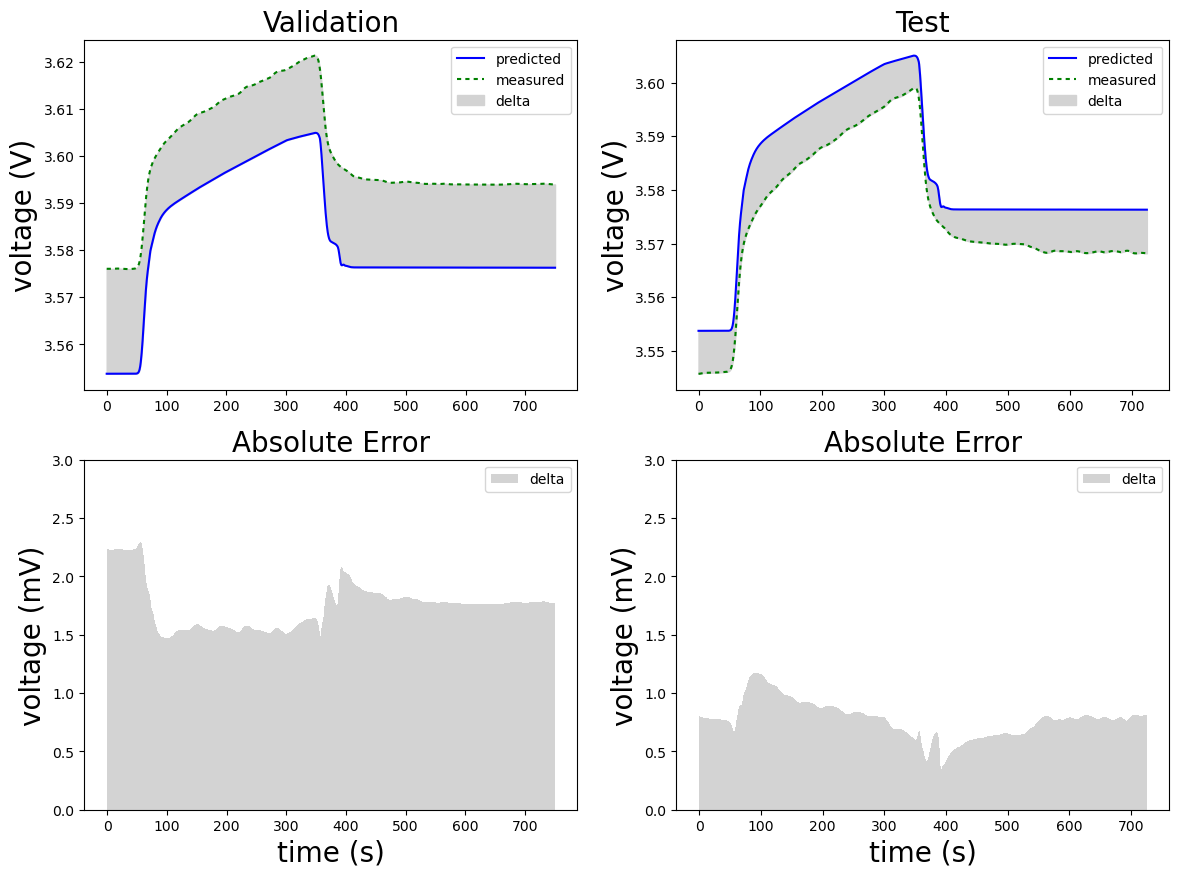

In [6]:
print('Validation Profile:', validation_profile)
print('Test Profile:', test_profile)

yhat_train_unscaled, _, _, fig = lstm.test(X_train, y_train[:,0], X_validation, y_validation[:,0], X_test, y_test[:,0], scalers_train)

# save plots and predicted sequences
np.save('../../../models/TGDS/' + str(MODEL_ID) + '/predictions', yhat_train_unscaled)
fig.savefig('../../../reports/figures/theory_guided_const-' + str(MODEL_ID) + '-validation&test_profiles.png')

### Prepare Data for Use Cases

In [7]:
# load test sets dictionary
TEST_SETS =  np.load('../../../models/training_setup/test_sets.npy', allow_pickle=True)
TEST_SETS = TEST_SETS.item()

# select needed test profiles
test_profiles_usecase_1 = TEST_SETS['Reproduction']
test_profiles_usecase_2 = TEST_SETS['Abstraction']
test_profiles_usecase_3 = TEST_SETS['Generalization']

# prepare input data
X_case_1, y_case_1, _ = util.prepare_intermediate_input(HYPER_PARAMS, test_profiles_usecase_1, HYPER_PARAMS['stack'], HYPER_PARAMS['cell'])
X_case_2, y_case_2, _ = util.prepare_intermediate_input(HYPER_PARAMS, test_profiles_usecase_2, HYPER_PARAMS['stack'], HYPER_PARAMS['cell'])
X_case_3, y_case_3, _ = util.prepare_intermediate_input(HYPER_PARAMS, test_profiles_usecase_3, HYPER_PARAMS['stack'], HYPER_PARAMS['cell'])

Input: (1500, 100, 2)  Output/Label: (1500, 2)
Input: (3100, 100, 2)  Output/Label: (3100, 2)
Input: (1600, 100, 2)  Output/Label: (1600, 2)


### Test Model on Use Cases

Use Case 1: ['Profile 10A']
Use Case 2: ['Profile 10A 3x']
Use Case 3: ['Profile -10A']
1461/1461 [==============================] - 12s 8ms/step
Prediction time on Training Set:  12.397s
47/47 [==============================] - 0s 8ms/step
Prediction time on Use Case 1:  0.403s
97/97 [==============================] - 1s 8ms/step
Prediction time on Use Case 2:  0.828s
50/50 [==============================] - 0s 8ms/step
Prediction time on Use Case 3:  0.431s
##############################################################
             Training    Use Case 1    Use Case 2    Use Case 3
---------  ----------  ------------  ------------  ------------
MSE  (μV)    115.1         309.2         194.5         724.9
MAE  (V)       0.0097        0.0175        0.0111        0.0173
MaxE (V)       0.023         0.023         0.0318        0.0455
##############################################################


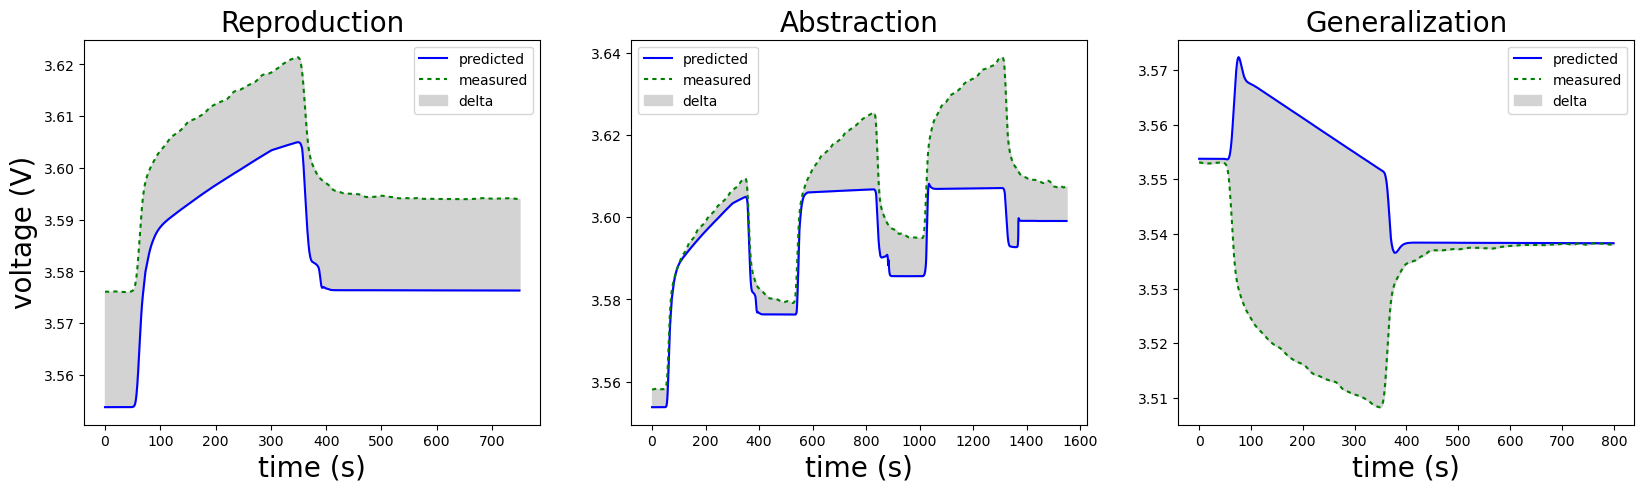

In [8]:
print('Use Case 1:', test_profiles_usecase_1)
print('Use Case 2:', test_profiles_usecase_2)
print('Use Case 3:', test_profiles_usecase_3)

train_mse, case_1_mse, case_2_mse, case_3_mse, fig = lstm.test_usecases(X_train, y_train[:,0], X_case_1, y_case_1[:,0], X_case_2, y_case_2[:,0], X_case_3, y_case_3[:,0], scalers_train)

In [9]:
fig.savefig('../../../reports/figures/data_baseline-' + str(MODEL_ID) + '-use_cases.png')
columns = ["Name", "Timestamp", "Model ID", "Train MSE", "Case 1 MSE", "Case 2 MSE", "Case 3 MSE"]
df = pd.DataFrame(columns=columns)

timestamp = datetime.datetime.now().isoformat(sep=" ", timespec="seconds")

new_df = pd.DataFrame([["Intermediate Variables", timestamp, MODEL_ID, train_mse, case_1_mse, case_2_mse, case_3_mse]], columns=columns)

df = pd.concat(([df, new_df]))
df.to_csv('../../../reports/results/experiments.csv', mode='a', float_format='%.10f', index=False, header=False)

In [10]:
cuda.select_device(0)
cuda.close()